In [49]:
#Libs necessárias

import pandas as pd
import numpy as np

#libs graficos

import matplotlib.pyplot as plt
import seaborn as sns

#avisos 

import warnings
warnings.filterwarnings('ignore')

## Explorando os dados

In [50]:
# Pergunta em aberto: Qual valor do seu aluguel

In [51]:
#importando dados 

dados = pd.read_csv('house_data.csv')

dados.shape

(10692, 13)

In [52]:
#Verificando 

dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [53]:
# Removendo colunas

dados.drop( columns=['fire insurance (R$)', 'total (R$)'], inplace=True )

In [54]:
dados.shape

(10692, 11)

In [55]:
# Campos vazios
dados.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [56]:
# Campos unicos
dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [57]:
#Tipo dos dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [58]:
dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

## Exploração Análitica (EDA)

In [59]:
# Filtrar os tipos de colunas
Colunas_Categoricas = dados.columns[ dados.dtypes == object ]
Colunas_Numericas = dados.columns[ dados.dtypes != object ]

Colunas_Categoricas, Colunas_Numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [60]:
# Analise dos campos objetos
dados['city'].value_counts( normalize=True ) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [61]:
#Loop
for Coluna in Colunas_Categoricas:
    
    Analise = dados[Coluna].value_counts(normalize=True) * 100
    
    print(Coluna, '\n', Analise, '\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [62]:
# Correção nos dados

# Ajustando o Andar
dados.loc[ dados['floor'] == '301' ]
dados.iloc[ 2562, 5 ] = 30

# Ajustar o '-'
dados['floor'] = dados['floor'].apply( lambda Registro : 0 if Registro == '-' else Registro )
dados['floor'] = pd.to_numeric( dados['floor'] )

# Verificar
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [63]:
len( Colunas_Numericas )

7

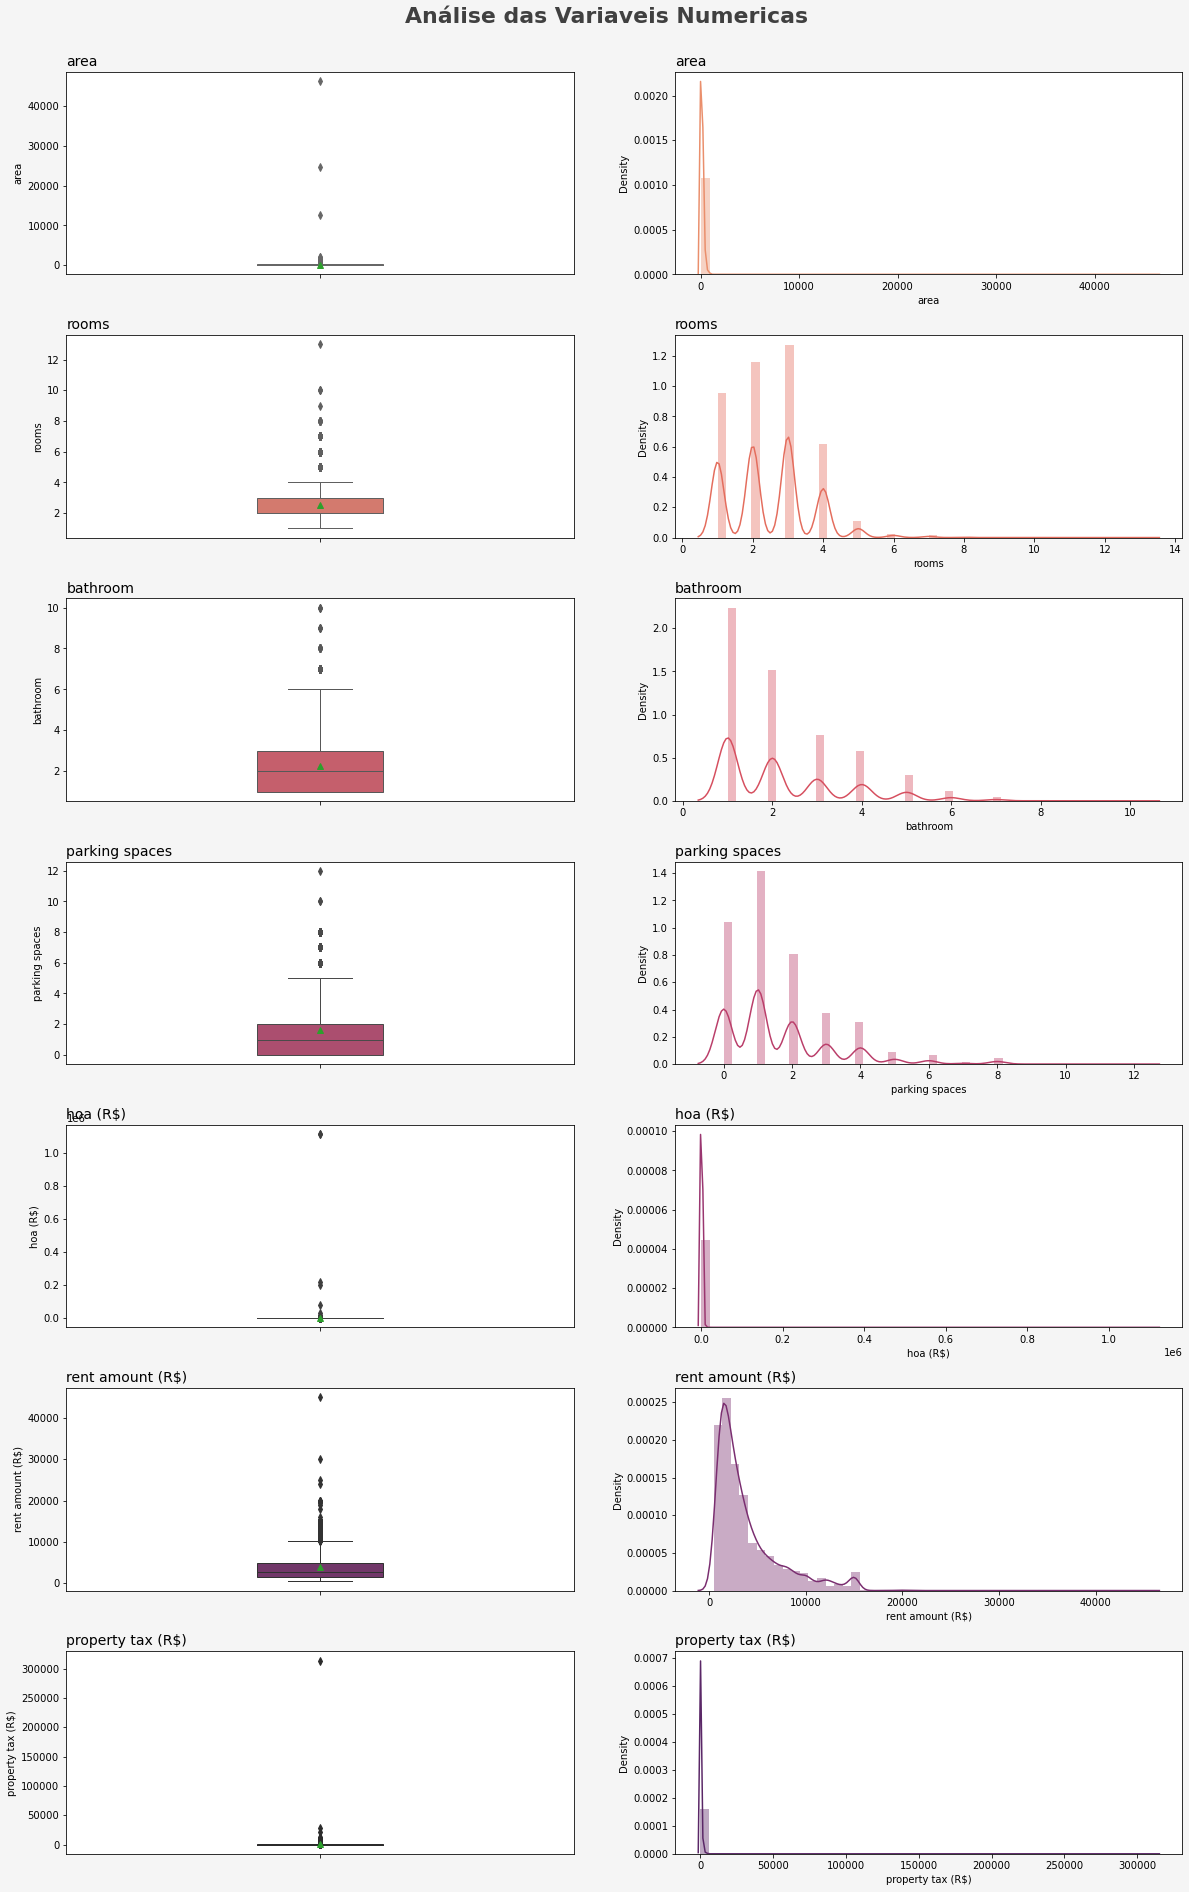

In [64]:
# Grid - Gráficos

# Tamanho
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo )

# Paleta de Cores
Paleta_Cores = sns.color_palette( 'flare', len(Colunas_Numericas) * 2 )

# Titulo
plt.suptitle('Análise das Variaveis Numericas', fontsize=22, color='#404040', fontweight=600 )

# Estrutura
Linhas = 7 # (Todas as infos numericas)
Colunas = 2 #( Boxplot - Distplot)
Posicao = 1 # Posicao inicial do grid

# Loop para plotar os gráficos
for Coluna in Colunas_Numericas:

  # Plot no Grid -- Boxplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Titulo
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.boxplot( data=dados, y=Coluna, showmeans=True, saturation=0.75, 
              linewidth=1, color=Paleta_Cores[Posicao], width=0.25 )

  # Mudar
  Posicao += 1

  # Plot no Grid -- Distplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Titulo
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.distplot( dados[Coluna], color=Paleta_Cores[ Posicao - 1 ] )

  # Mudar
  Posicao += 1

# Ajute de Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )

## Engenharia de Features

In [65]:
# Ajuste das colunas categoricas
dados['animal'] = dados['animal'].map( {'acept':1, 'not acept':0} )
dados['furniture'] = dados['furniture'].map( {'furnished':1, 'not furnished':0} )

# Filtrar a Cidade de São Paulo
Filtro_SP = dados.loc[ dados['city'] == 'São Paulo']

# Verificar
Filtro_SP.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [66]:
# Retirando a Coluna Cidade
Filtro_SP.drop( columns=['city'], inplace=True )

In [67]:
# Separa os dados
Caracteristicas = Filtro_SP.drop( columns=['rent amount (R$)'] )
Previsor = Filtro_SP['rent amount (R$)']

# VErificar
Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [68]:
Caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [69]:
# Previsoor
Previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [70]:
# Correlação
Filtro_SP.corr()

# Proxima de 1 - Correlação Possitva [ Ambas Sobem ]
# Proxima de -1 - Correlação Negativa [ Uma sobe outra desce ]

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000
